In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os as os
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [2]:
os.chdir(r"./Data")
df = pd.read_csv("pd_speech_features.csv")
os.chdir("..")

SCORING = ['accuracy', 'precision', 'recall']

In [3]:
df = df.groupby(by=df.id).mean()

In [4]:
df['class'].value_counts()

1.0    188
0.0     64
Name: class, dtype: int64

In [5]:
df.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.823387,0.696370,0.567250,235.333333,234.333333,0.008220,0.000073,0.001963,0.000016,...,1.561733,2.862000,12.293333,9.717500,9.055300,6.259100,4.021533,4.164333,22.961700,1.0
1,0.0,0.415637,0.793993,0.592453,213.333333,211.000000,0.008884,0.001849,0.005790,0.000050,...,4.918567,4.827133,6.117633,8.599667,5.737233,7.933133,5.490533,4.941833,4.467233,1.0
2,1.0,0.801973,0.619967,0.520563,319.333333,318.333333,0.006041,0.000104,0.002217,0.000013,...,41.129400,31.201933,14.584467,5.446800,3.462000,4.772067,9.176633,11.848100,5.552367,1.0
3,0.0,0.828707,0.626097,0.537183,493.000000,492.000000,0.003913,0.000042,0.000757,0.000003,...,1.677633,1.908400,2.842167,3.493867,3.282433,3.085267,3.184433,4.032933,22.773633,1.0
4,0.0,0.831287,0.779397,0.726717,362.666667,361.666667,0.005622,0.002023,0.003593,0.000021,...,4.104600,4.285233,2.953200,2.799933,2.645100,2.811367,7.268333,13.338833,63.766900,1.0


In [6]:
df_y = df['class']
df = df.drop('class', axis=1)

In [7]:
df, val_df, df_y, val_y = train_test_split(df, df_y, test_size=0.2, stratify=df_y)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, accuracy_score

from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

In [9]:
model = RandomForestClassifier(n_estimators=1000, max_depth=9)

In [10]:
results = cross_validate(model, df, df_y, scoring=SCORING, n_jobs=-1)

In [11]:
print("Accuracy: " + str(results["test_accuracy"].mean()))
print("Accuracy standard deviation: " + str(np.std(results["test_accuracy"])))
print("Precision: " + str(results["test_precision"].mean()))
print("Precision standard deviation: " + str(np.std(results["test_precision"])))
print("Recall: " + str(results["test_recall"].mean()))
print("Recall standard deviation: " + str(np.std(results["test_recall"])))

Accuracy: 0.7959756097560976
Accuracy standard deviation: 0.0431690091981012
Precision: 0.8230360531309298
Precision standard deviation: 0.02769185747458245
Recall: 0.9266666666666667
Recall standard deviation: 0.038873012632301994


In [12]:
model.fit(df, df_y)

RandomForestClassifier(max_depth=9, n_estimators=1000)

In [13]:
val_result = model.predict(val_df)

print('Validation accuracy: ' + str(accuracy_score(val_y, val_result)))
print('Validation precision: ' + str(precision_score(val_y, val_result)))
print('Validation recall: ' + str(recall_score(val_y, val_result)))

Validation accuracy: 0.8627450980392157
Validation precision: 0.8780487804878049
Validation recall: 0.9473684210526315


<AxesSubplot: >

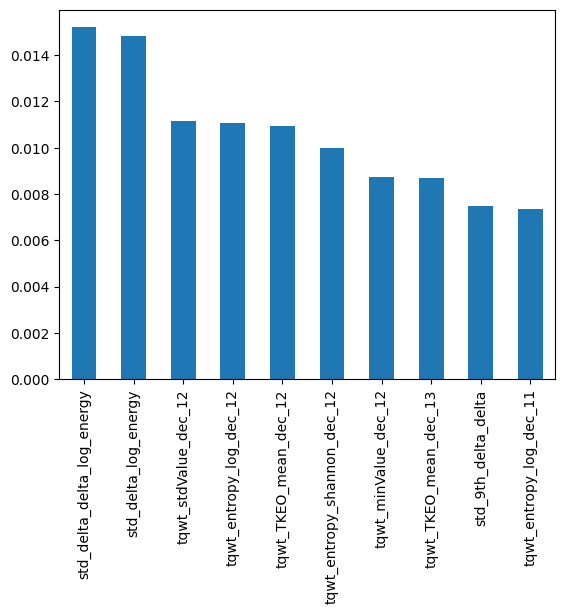

In [14]:
feature_imp = pd.Series(model.feature_importances_, index=df.columns[:len(model.feature_importances_)]).sort_values(ascending=False)

feature_imp.head(n=10).plot.bar()

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
X_resampled, y_resampled = SMOTE().fit_resample(df, df_y)

In [17]:
y_resampled.value_counts()

1.0    150
0.0    150
Name: class, dtype: int64

In [18]:
results = cross_validate(RandomForestClassifier(n_estimators=1000, max_depth=9), X_resampled, y_resampled, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1, cv=10)

In [19]:
print("Accuracy: " + str(results["test_accuracy"].mean()))
print("Accuracy standard deviation: " + str(np.std(results["test_accuracy"])))
print("Precision: " + str(results["test_precision"].mean()))
print("Precision standard deviation: " + str(np.std(results["test_precision"])))
print("Recall: " + str(results["test_recall"].mean()))
print("Recall standard deviation: " + str(np.std(results["test_recall"])))

Accuracy: 0.8966666666666667
Accuracy standard deviation: 0.060461190490723495
Precision: 0.9331588019823315
Precision standard deviation: 0.07725253089819406
Recall: 0.8600000000000001
Recall standard deviation: 0.08137703743822469


In [20]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=9)

clf.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=9, n_estimators=1000)

In [21]:
val_result = clf.predict(val_df)

print('Validation accuracy: ' + str(accuracy_score(val_y, val_result)))
print('Validation precision: ' + str(precision_score(val_y, val_result)))
print('Validation recall: ' + str(recall_score(val_y, val_result)))

Validation accuracy: 0.9019607843137255
Validation precision: 0.9230769230769231
Validation recall: 0.9473684210526315


<AxesSubplot: title={'center': 'Feature importance'}>

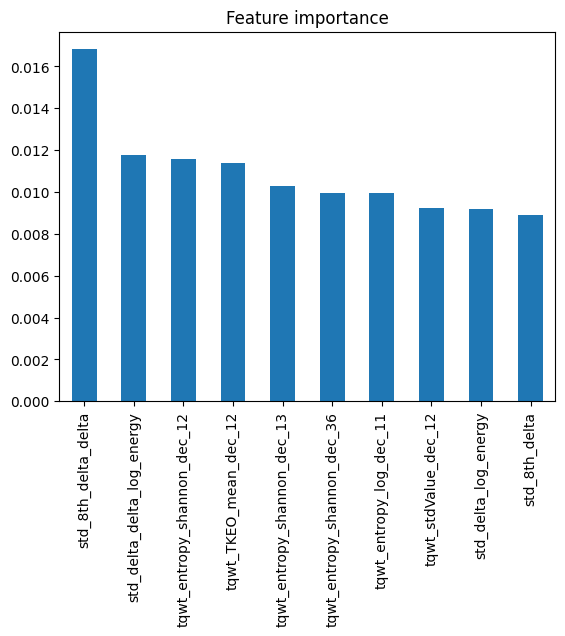

In [23]:
feature_imp = pd.Series(clf.feature_importances_, index=df.columns[:len(clf.feature_importances_)], name='Importance').sort_values(ascending=False)

feature_imp.head(n=10).plot.bar(title='Feature importance')

<AxesSubplot: >

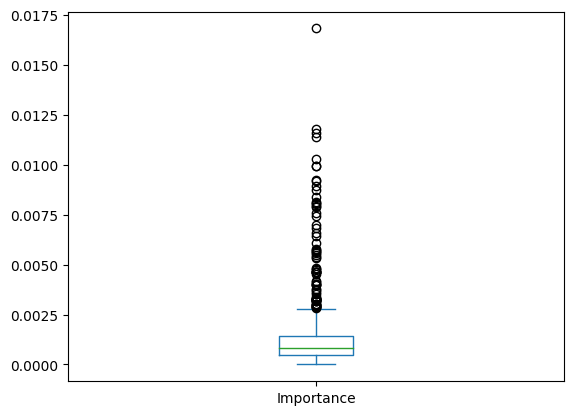

In [24]:
feature_imp.plot(kind='box')

In [25]:
example = val_df.sample(1)

In [26]:
example

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
id,,,,,,,,,,,,,,,,,,,,,
55,1.0,0.82219,0.777813,0.53002,324.0,323.0,0.00596,0.000166,0.00101,0.000006,...,2.7452,10.856367,13.0836,11.746567,7.665533,4.7873,6.256467,15.055033,19.3479,67.4812


In [29]:
clf.predict_proba(example)

array([[0.03819237, 0.96180763]])